In [1]:
import pandas as pd #to reading data_set
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("C:\\Users\\ALTHOURAYA\\.anaconda\\AI-College-Project\\Data_preprocessing\\Final_Data.csv")

In [2]:
data.shape

(101766, 73)

In [3]:
data.head(5)

,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_emergency,...,d3_Circulatory,d3_Diabetes,d3_Digestive,d3_External_causes,d3_Genitourinary,d3_Injury,d3_Musculoskeletal,d3_Neoplasms,d3_Respiratory,d3_Supplementary_classification
0,0,1,0,4,1,16,41,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,2,3,6,59,0,18,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,2,2,6,11,5,13,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,2,2,6,44,1,16,0,...,1,0,0,0,0,0,0,0,0,0
4,1,1,0,2,1,6,51,0,8,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
for col in data.columns: # to know num of un values + print the largest five ones !
    print (col ,": " ,data[col].nunique())
    print(data[col].value_counts().nlargest(5))
    print('\n')


gender :  2
gender
0    54711
1    47055
Name: count, dtype: int64


admission_type_id :  5
admission_type_id
1    64386
0    18869
4    18480
3       21
2       10
Name: count, dtype: int64


discharge_disposition_id :  8
discharge_disposition_id
0    70031
2    13954
5    12902
3     2128
4     1184
Name: count, dtype: int64


admission_source_id :  8
admission_source_id
2    64588
4    29565
6     3187
7     2264
0     1104
Name: count, dtype: int64


time_in_hospital :  12
time_in_hospital
3    17756
2    17224
1    14208
4    13924
5     9966
Name: count, dtype: int64


medical_specialty :  29
medical_specialty
6     64584
1      7565
3      7440
0      5352
24     3099
Name: count, dtype: int64


num_lab_procedures :  96
num_lab_procedures
1     3208
43    2804
44    2496
45    2376
38    2213
Name: count, dtype: int64


num_procedures :  6
num_procedures
0    46652
1    20742
2    12717
3     9443
5     8032
Name: count, dtype: int64


num_medications :  35
num_medications
13   

In [6]:
num_col = [
    "time_in_hospital", 
    "num_lab_procedures", 
    "num_procedures",   
    "number_diagnoses",
    "Total_visits"
]
#5 columns

In [7]:
# Check if columns in num_cols exist
for col in num_col:
    if col not in data.columns:
        print(f"Column '{col}' does not exist in the dataset.")

In [8]:

# Filter the dataset to contain only the numeric columns for plotting
df_num = data[num_col]

# Set the style for the plots
sns.set(style="whitegrid")



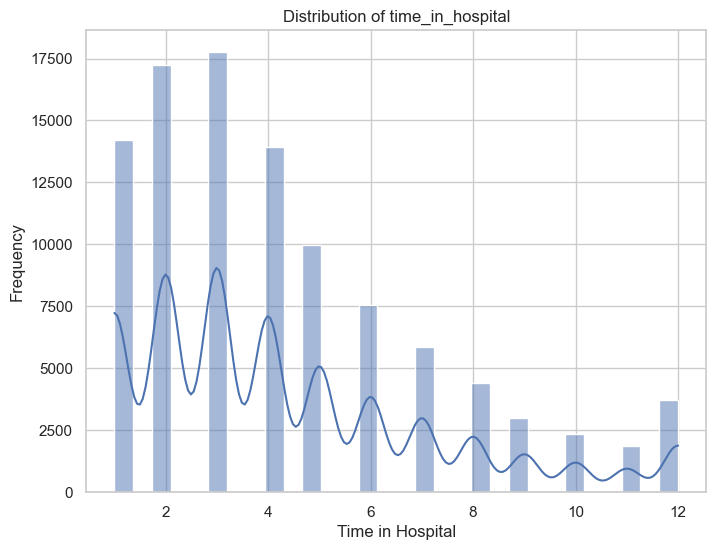

In [9]:
# Plot for one feature (e.g., 'time_in_hospital')
plt.figure(figsize=(8, 6))
sns.histplot(df_num['time_in_hospital'], kde=True, bins=30)
plt.title('Distribution of time_in_hospital')
plt.xlabel('Time in Hospital')
plt.ylabel('Frequency')
plt.show()


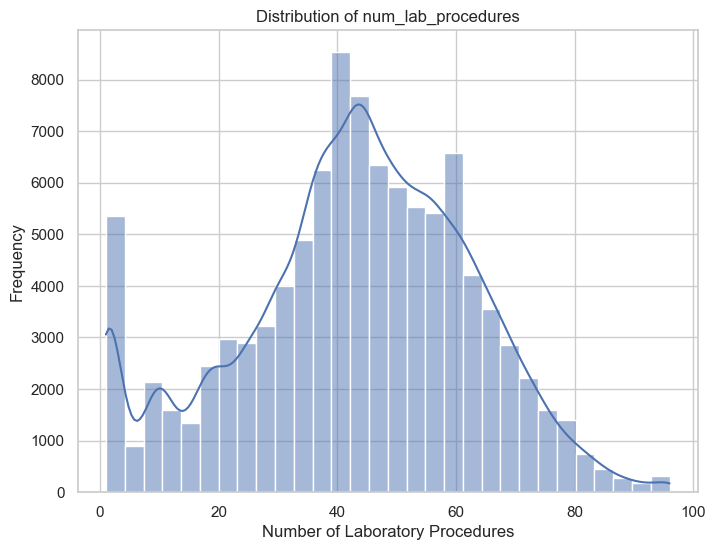

In [10]:
# Plot for one feature (e.g., 'time_in_hospital')
plt.figure(figsize=(8, 6))
sns.histplot(df_num['num_lab_procedures'], kde=True, bins=30)
plt.title('Distribution of num_lab_procedures')
plt.xlabel('Number of Laboratory Procedures')
plt.ylabel('Frequency')
plt.show()

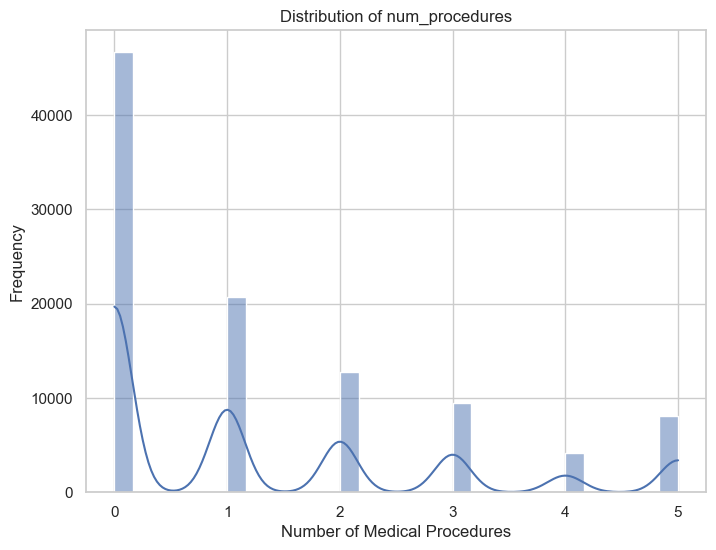

In [11]:
# Plot for one feature (e.g., 'time_in_hospital')
plt.figure(figsize=(8, 6))
sns.histplot(df_num['num_procedures'], kde=True, bins=30)
plt.title('Distribution of num_procedures')
plt.xlabel('Number of Medical Procedures')
plt.ylabel('Frequency')
plt.show()

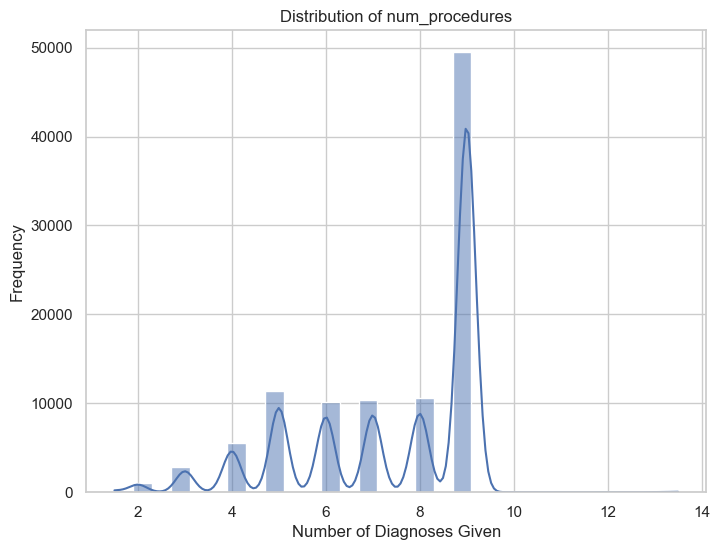

In [12]:
# Plot for one feature (e.g., 'time_in_hospital')
plt.figure(figsize=(8, 6))
sns.histplot(df_num['number_diagnoses'], kde=True, bins=30)
plt.title('Distribution of num_procedures')
plt.xlabel('Number of Diagnoses Given')
plt.ylabel('Frequency')
plt.show()

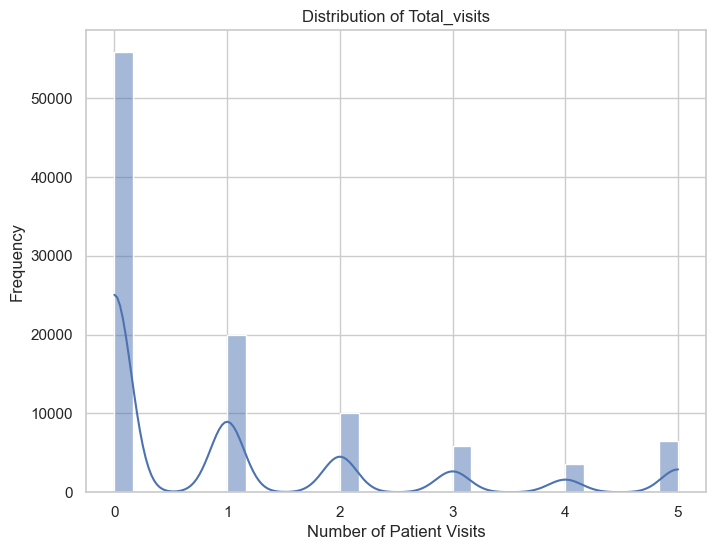

In [13]:
# Plot for one feature (e.g., 'time_in_hospital')
plt.figure(figsize=(8, 6))
sns.histplot(df_num['Total_visits'], kde=True, bins=30)
plt.title('Distribution of Total_visits')
plt.xlabel('Number of Patient Visits')
plt.ylabel('Frequency')
plt.show()

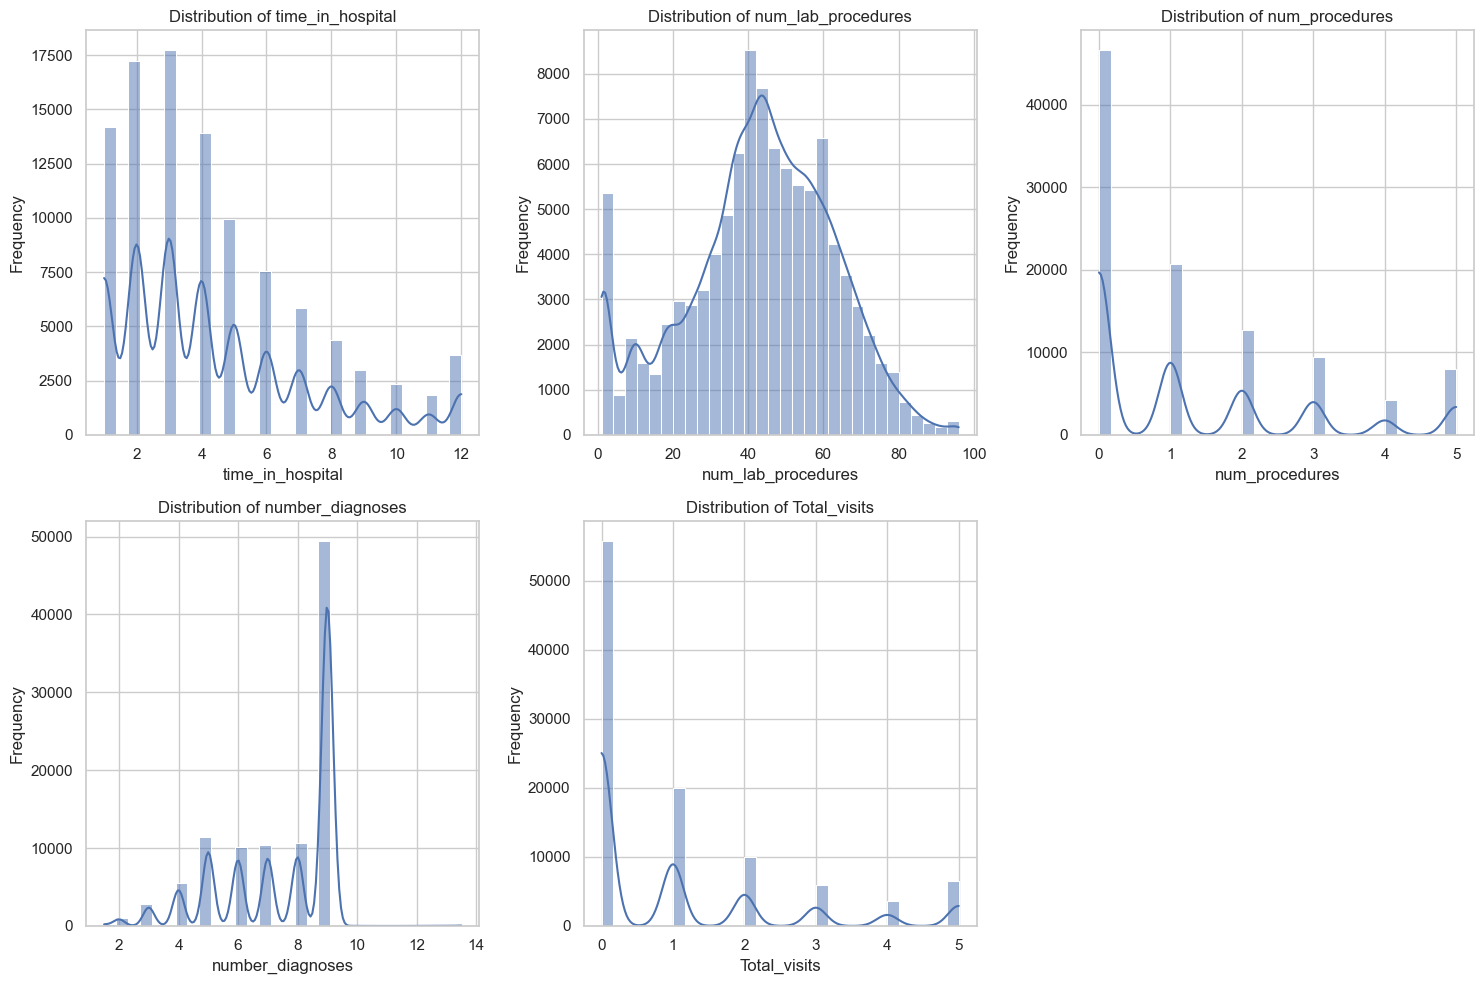

In [14]:
# Assuming df_num and num_col are defined
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  
axes = axes.flatten()  # Flatten for easy iteration

for i, col in enumerate(num_col):
    sns.histplot(df_num[col], kde=True, bins=30, ax=axes[i])  
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide the last unused subplot
if len(num_col) < len(axes):
    fig.delaxes(axes[len(num_col)])

plt.tight_layout()
plt.show()


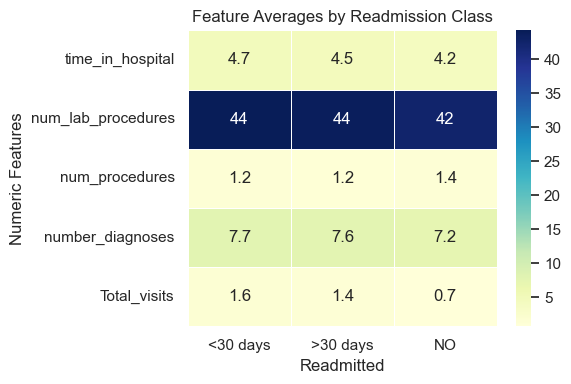

In [15]:
# Group by the three-class readmission target (0: <30, 1: >30, 2: NO)
grouped_means = data.groupby('readmitted')[num_col].mean().T

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(grouped_means, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Feature Averages by Readmission Class")
plt.xlabel("Readmitted")
plt.ylabel("Numeric Features")
plt.xticks([0.5, 1.5, 2.5], ['<30 days', '>30 days', 'NO'], rotation=0)  # Custom labels
plt.tight_layout()
plt.show()
